# Predicting Ecommerce Customer Churn

In this project I address customer churn at an e-commerce site which is a significant cost for e-commerce businesses. Using the Ecommerce Customer Churn Analysis and Prediction dataset from Kaggle and well established data science techniques, I build a classification model to help better predict when a customer is likely to discontinue using the service.  This will allow management an opportunity to intervene before the customer leaves, thus reducing customer loss and the need to replace that revenue.

## Import Packages

These are the packages I will use for the project.

In [197]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
	
from sklearn.metrics import roc_auc_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.utils import resample

from imblearn.over_sampling import SMOTE

## Dataset

The dataset used for this project is the Ecommerce Customer Churn Analysis and Prediction dataset from Kaggle. It contains 5,630 rows representing individual customers. There are 20 different features including tenure, gender, marital status, satisfaction score, coupon used, etc. Churn is the target.

## Import data

In [198]:
# load the dataset
df = pd.read_csv("E_Comm_Table_1.csv")

## Data Exploration & Manipulation

In [199]:
# look at the dataframe
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [288]:
# rename some columns name for visualization

df = df.rename(columns={'SatisfactionScore':'Satisfaction_Score', 'NumberOfDeviceRegistered':'Number_of_Devices', 'DaySinceLastOrder':'Days_Since_Last_Order', 'WarehouseToHome' : 'Warehouse_To_Home' })

In [289]:
# look at the numeric columns
df.describe()

,CustomerID,Churn,CityTier,Warehouse_To_Home,HourSpendOnApp,Number_of_Devices,Satisfaction_Score,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,Days_Since_Last_Order,CashbackAmount
count,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.00000,3774.000000,3774.000000,3774.000000,3774.000000
mean,53017.994966,0.167197,1.707737,15.743773,2.981187,3.754107,3.056439,4.216481,0.282194,15.72761,1.719661,2.825384,4.526232,164.215156
std,1608.979289,0.373201,0.936725,8.594330,0.722158,1.025233,1.389730,2.562142,0.450127,3.62991,1.674508,2.467597,3.371310,24.089821
min,50001.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.00000,0.000000,1.000000,0.000000,0.000000
25%,51656.250000,0.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.00000,1.000000,1.000000,2.000000,148.250000
50%,53160.500000,0.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.00000,1.000000,2.000000,3.000000,160.000000
75%,54394.500000,0.000000,3.000000,21.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.00000,2.000000,3.000000,7.000000,178.000000
max,55630.000000,1.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.00000,16.000000,16.000000,46.000000,325.000000


In [202]:
# check for NAs
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [203]:
# as there are not many NAs I will drop them from the dataframe
df = df.dropna()

In [204]:
# look at values in target 'Churn'
df.Churn.unique()

array([1, 0])

In [205]:
# identify target/split off target
X = df.drop('Churn', axis=1)
y = df.Churn

In [206]:
# target balance
df.Churn.value_counts(normalize=True)

0    0.832803
1    0.167197
Name: Churn, dtype: float64

## Create Train and Test Data

In [207]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

## Create Validation Data

In [208]:
# create validation data
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size = 0.20, random_state = 42)

## Pre-process Training Data

In [209]:
# isolate numerical columns
X_t_num = X_t.select_dtypes(exclude='object')
X_t_num.shape

(2415, 14)

In [210]:
# scale numerical data
from sklearn.preprocessing import OneHotEncoder, StandardScaler
ss = StandardScaler()
X_t_sc = pd.DataFrame(ss.fit_transform(X_t_num), index= X_t_num.index, columns= X_t_num.columns)
X_t_sc.shape

(2415, 14)

In [211]:
# add in one hot encoded
ohe = OneHotEncoder(sparse= False, drop= 'first')

X_t_cat = X_t.select_dtypes(include= 'object')

#fit transform
X_t_oh = pd.DataFrame(ohe.fit_transform(X_t_cat), index= X_t_cat.index, columns=ohe.get_feature_names(X_t_cat.columns))
X_t_oh.shape

(2415, 16)

In [212]:
# merge databases
X_t_f = pd.merge(X_t_sc, X_t_oh, left_index=True, right_index=True)
X_t_f.shape

(2415, 30)

In [213]:
# smote
smote = SMOTE()
X_t_sm, y_t_sm = smote.fit_sample(X_t_f, y_t)

## Pre-process Validation Data

In [214]:
# isolate numerical columns
X_val_num = X_val.select_dtypes(exclude='object')
X_val_num.shape

(604, 14)

In [215]:
# scale numerical data
X_val_sc = pd.DataFrame(ss.transform(X_val_num), index= X_val_num.index, columns= X_val_num.columns)
X_val_sc.shape

(604, 14)

In [216]:
# one hot encoded

X_val_cat = X_val.select_dtypes(include= 'object')

# transform
X_val_oh = pd.DataFrame(ohe.transform(X_val_cat), index= X_val_cat.index, columns=ohe.get_feature_names(X_val_cat.columns))
X_val_oh.shape

(604, 16)

In [217]:
# merge databases
X_val_f = pd.merge(X_val_sc, X_val_oh, left_index=True, right_index=True)
X_val_f.shape

(604, 30)

## Model Metrics

I will use Accuracy and F-1 Score (a balance of Precision and Recall) as my primary metrics. In this business case, minimizing the number of False Negatives (the number of customers predicted to stay that actually leave) is important and is generally measured by a Recall Score. But a case can be made that minimizing False Positives (the number of customers predicted to leave that actually stay) is also important and is generally measured by a Precision Score. So an F-1 Score is considered to be a nice balanced metric between Precision and Recall.

## First Simple Modle

Logistic regression does not perform very well even after tuning several hyper parameters. I will move onto other models that usually perform better in binary classification such as Random Forest, K Nearest Neighbor, etc.

In [218]:
# instantiate model
lg = LogisticRegression()

# fit model
lg.fit(X_t_sm, y_t_sm)

# check accuracy on training data
lg.score(X_t_sm, y_t_sm)

0.8252741774675972

In [219]:
# validation testing

# set predictions
pred_lg_val = lg.predict(X_val_f)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_lg_val))
print(classification_report(y_val, pred_lg_val))

[[402  87]
 [ 23  92]]
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       489
           1       0.51      0.80      0.63       115

    accuracy                           0.82       604
   macro avg       0.73      0.81      0.75       604
weighted avg       0.86      0.82      0.83       604



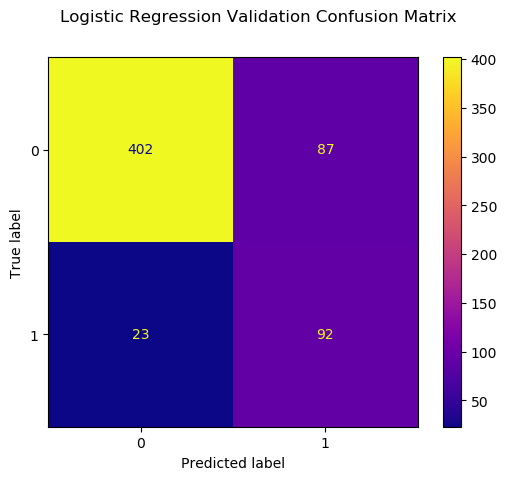

In [220]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("Logistic Regression Validation Confusion Matrix ")

plot_confusion_matrix(lg, X_val_f, y_val, ax=ax, cmap="plasma");

## Support Vector Machine (SVM)

In [221]:
# instantiate model
svm = svm.SVC()

# fit model
svm.fit(X_t_sm, y_t_sm)

# check accuracy on training data
svm.score(X_t_sm, y_t_sm)

0.9638584247258225

In [222]:
# validation testing

# set predictions
pred_svm_val = svm.predict(X_val_f)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_svm_val))
print(classification_report(y_val, pred_svm_val))

[[447  42]
 [ 25  90]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       489
           1       0.68      0.78      0.73       115

    accuracy                           0.89       604
   macro avg       0.81      0.85      0.83       604
weighted avg       0.90      0.89      0.89       604



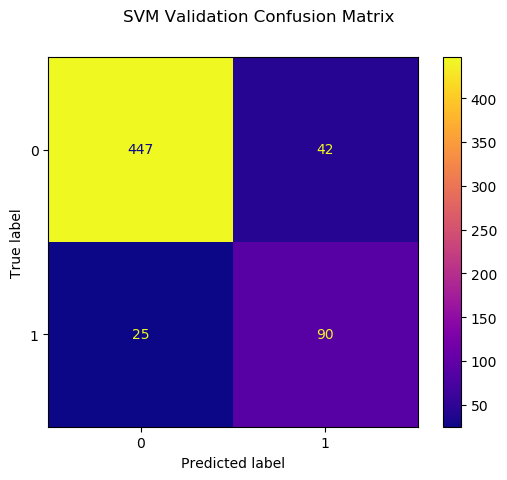

In [223]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("SVM Validation Confusion Matrix ")

plot_confusion_matrix(svm, X_val_f, y_val, ax=ax, cmap="plasma");

## Random Forest Classifier

In [224]:
# instantiate model
rfm = RandomForestClassifier()

# fit model
rfm.fit(X_t_sm, y_t_sm)

# check accuracy
rfm.score(X_t_sm, y_t_sm)

1.0

In [225]:
# validation testing

# set predictions
pred_rfm_val = rfm.predict(X_val_f)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_rfm_val))
print(classification_report(y_val, pred_rfm_val))

[[475  14]
 [ 32  83]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       489
           1       0.86      0.72      0.78       115

    accuracy                           0.92       604
   macro avg       0.90      0.85      0.87       604
weighted avg       0.92      0.92      0.92       604



In [226]:
# adjust some hyper parameters to address overfitting

# instantiate model
rfm2 = RandomForestClassifier(n_estimators=15, max_depth=15, max_leaf_nodes=500)

# fit model
rfm2.fit(X_t_sm, y_t_sm)

# check accuracy on training data
rfm2.score(X_t_sm, y_t_sm)

0.9992522432701895

In [227]:
# validation testing

# set predictions
pred_rfm2_val = rfm2.predict(X_val_f)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_rfm2_val))
print(classification_report(y_val, pred_rfm2_val))

[[471  18]
 [ 36  79]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       489
           1       0.81      0.69      0.75       115

    accuracy                           0.91       604
   macro avg       0.87      0.83      0.85       604
weighted avg       0.91      0.91      0.91       604



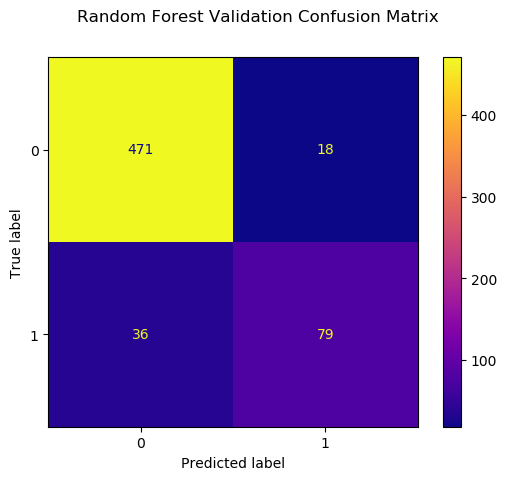

In [228]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("Random Forest Validation Confusion Matrix ")

plot_confusion_matrix(rfm2, X_val_f, y_val, ax=ax, cmap="plasma");

## K Nearest Neighbor (KNN)

In [229]:
# instantiate model
knn = KNeighborsClassifier()
# fit model
knn = knn.fit(X_t_sm, y_t_sm)
# check accuracy
knn.score(X_t_sm, y_t_sm)

0.939431704885344

In [230]:
# validation testing

# set predictions
pred_knn_val = knn.predict(X_val_f)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_knn_val))
print(classification_report(y_val, pred_knn_val))

[[401  88]
 [ 10 105]]
              precision    recall  f1-score   support

           0       0.98      0.82      0.89       489
           1       0.54      0.91      0.68       115

    accuracy                           0.84       604
   macro avg       0.76      0.87      0.79       604
weighted avg       0.89      0.84      0.85       604



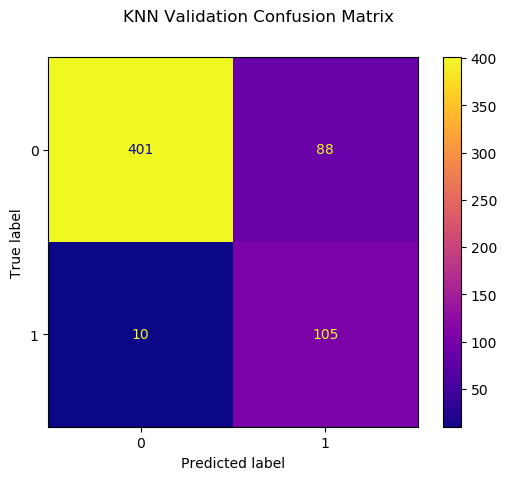

In [231]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("KNN Validation Confusion Matrix ")

plot_confusion_matrix(knn, X_val_f, y_val, ax=ax, cmap="plasma");

## Decision Tree Classifier

In [232]:
# instantiate model
dtc = DecisionTreeClassifier()
# fit model
dtc = dtc.fit(X_t_sm, y_t_sm)
# check accuracy
dtc.score(X_t_sm, y_t_sm)

1.0

In [233]:
# validation testing

# set predictions
pred_dtc_val = dtc.predict(X_val_f)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_dtc_val))
print(classification_report(y_val, pred_dtc_val))

[[453  36]
 [ 37  78]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       489
           1       0.68      0.68      0.68       115

    accuracy                           0.88       604
   macro avg       0.80      0.80      0.80       604
weighted avg       0.88      0.88      0.88       604



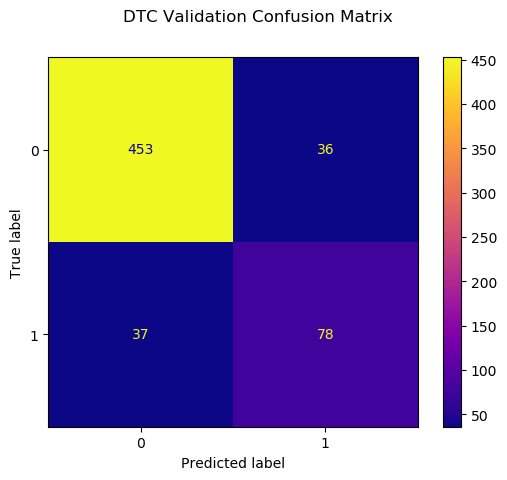

In [234]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("DTC Validation Confusion Matrix ")

plot_confusion_matrix(dtc, X_val_f, y_val, ax=ax, cmap="plasma");

## Gaussian Naive Bayes

In [235]:
# instantiate model
nbclf = GaussianNB()
# fit model
nbclf = nbclf.fit(X_t_sm, y_t_sm)
# check accuracy
nbclf.score(X_t_sm, y_t_sm)

0.5807577268195414

In [236]:
# validation testing

# set predictions
pred_nbclf_val = nbclf.predict(X_val_f)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_nbclf_val))
print(classification_report(y_val, pred_nbclf_val))

[[ 86 403]
 [  5 110]]
              precision    recall  f1-score   support

           0       0.95      0.18      0.30       489
           1       0.21      0.96      0.35       115

    accuracy                           0.32       604
   macro avg       0.58      0.57      0.32       604
weighted avg       0.81      0.32      0.31       604



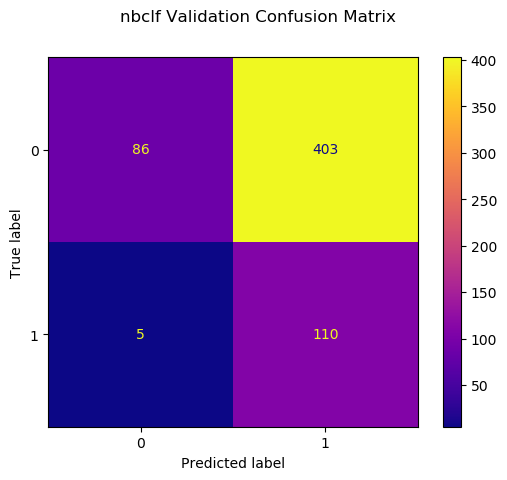

In [237]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("nbclf Validation Confusion Matrix ")

plot_confusion_matrix(nbclf, X_val_f, y_val, ax=ax, cmap="plasma");

## XGBoost Model

In [238]:
XGB_model=xgb.XGBClassifier(random_state=42,learning_rate=0.01)
XGB_model.fit(X_t_sm, y_t_sm)
# check accuracy
XGB_model.score(X_t_sm, y_t_sm)

0.8676470588235294

In [239]:
# validation testing

# set predictions
pred_XGB_model_val = XGB_model.predict(X_val_f)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_XGB_model_val))
print(classification_report(y_val, pred_XGB_model_val))

[[434  55]
 [ 34  81]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       489
           1       0.60      0.70      0.65       115

    accuracy                           0.85       604
   macro avg       0.76      0.80      0.78       604
weighted avg       0.86      0.85      0.86       604



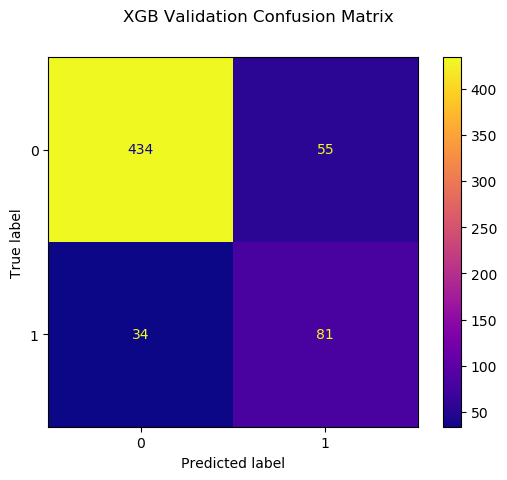

In [240]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("XGB Validation Confusion Matrix ")

plot_confusion_matrix(XGB_model, X_val_f, y_val, ax=ax, cmap="plasma");

## Stacking Ensemble Models

The Stacked Model performs the best on validation data based on Accuracy and F-1 Score and I will use it as my final model.

In [241]:
# Create Base Learners
base_learners = [
                 ('rfm2', RandomForestClassifier(n_estimators=10, random_state=42)),
                 ('knn', KNeighborsClassifier(n_neighbors=5)),
                 ('dtc', DecisionTreeClassifier())
                ]

# Initialize Stacking Classifier with the Meta Learner
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# fit model and check accuracy score
clf.fit(X_t_sm, y_t_sm).score(X_t_sm, y_t_sm)

0.9992522432701895

In [242]:
# validation testing

# set predictions
pred_clf_val = clf.predict(X_val_f)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_clf_val))
print(classification_report(y_val, pred_clf_val))

[[479  10]
 [ 25  90]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       489
           1       0.90      0.78      0.84       115

    accuracy                           0.94       604
   macro avg       0.93      0.88      0.90       604
weighted avg       0.94      0.94      0.94       604



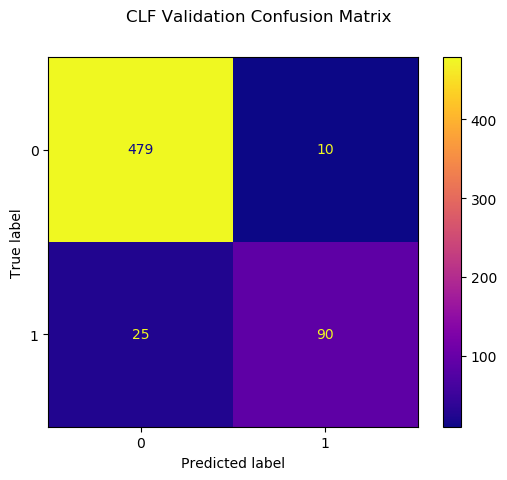

In [243]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("CLF Validation Confusion Matrix ")

plot_confusion_matrix(clf, X_val_f, y_val, ax=ax, cmap="plasma");

## Pre-process Entire Training Set for Final Model

In [244]:
# isolate numerical columns
X_train_num = X_train.select_dtypes(exclude='object')
X_train_num.shape

(3019, 14)

In [245]:
# scale numerical data
ss_f = StandardScaler()

X_train_sc = pd.DataFrame(ss_f.fit_transform(X_train_num), index= X_train_num.index, columns= X_train_num.columns)
X_train_sc.shape

(3019, 14)

In [246]:
# one hot encode
ohe_f = OneHotEncoder(sparse= False, handle_unknown='ignore')

X_train_cat = X_train.select_dtypes(include= 'object')

#fit transform
X_train_oh = pd.DataFrame(ohe_f.fit_transform(X_train_cat), index= X_train_cat.index, columns=ohe_f.get_feature_names(X_train_cat.columns))
X_train_oh.shape

(3019, 21)

In [247]:
# merge databases
X_train_f = pd.merge(X_train_sc, X_train_oh, left_index=True, right_index=True)
X_train_f.shape

(3019, 35)

In [248]:
# smote
sm_f = SMOTE()

X_train_sm, y_train_sm = smote.fit_sample(X_train_f, y_train)

## Pre-processing Test Data for Final Model

In [249]:
# isolate numerical columns
X_test_num = X_test.select_dtypes(exclude='object')

X_test_num.shape

(755, 14)

In [250]:
# scale numerical data
X_test_sc = pd.DataFrame(ss_f.transform(X_test_num), index= X_test_num.index, columns= X_test_num.columns)

X_test_sc.shape

(755, 14)

In [251]:
# one hot encode

X_test_cat = X_test.select_dtypes(include= 'object')

X_test_oh = pd.DataFrame(ohe_f.transform(X_test_cat), index= X_test_cat.index, columns=ohe_f.get_feature_names(X_test_cat.columns))

In [252]:
# merge databases
X_test_f = pd.merge(X_test_sc, X_test_oh, left_index=True, right_index=True)
X_test_f.shape

(755, 35)

In [253]:
X_test_f.head()

,CustomerID,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
178,-1.789099,-0.610433,1.391318,-0.329268,0.015262,-1.720102,-0.751625,0.292397,-0.622421,-1.307272,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5627,1.622132,-0.998492,-0.749008,-0.565051,0.015262,-1.720102,0.688195,-0.481942,1.606629,1.447425,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4136,0.688723,-0.093020,1.391318,2.264342,1.411490,1.197853,-0.031715,-0.481942,-0.622421,1.722895,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2348,-0.430617,-1.127846,-0.749008,-1.036616,-1.380966,-0.747450,-1.471536,0.292397,-0.622421,-1.307272,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
642,-1.498622,0.165687,-0.749008,-0.800834,-1.380966,-0.747450,0.688195,-0.094772,-0.622421,-0.205393,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Re-fit Final Model to Entire Training Set

In [254]:
# fit model
clf = clf.fit(X_train_sm, y_train_sm)
# check accuracy
clf.score(X_train_sm, y_train_sm)

0.9995991983967936

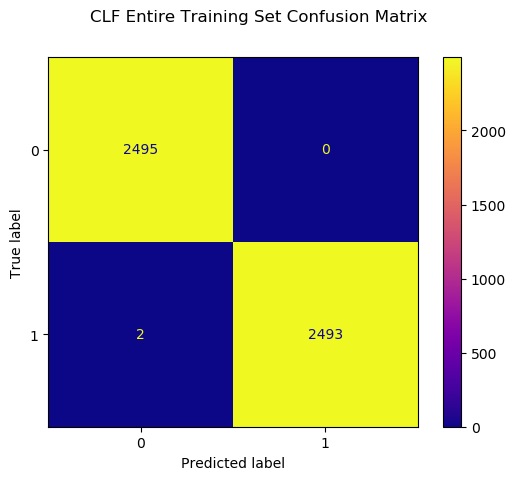

In [255]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("CLF Entire Training Set Confusion Matrix ")

plot_confusion_matrix(clf, X_train_sm, y_train_sm, ax=ax, cmap="plasma");

## Run Final Model on Test Data

In [256]:
clf.score(X_test_f, y_test)

0.9576158940397351

In [257]:
# set predictions
pred_clf_test = clf.predict(X_test_f)

# confusion matrix and classification report
print(confusion_matrix(y_test, pred_clf_test))
print(classification_report(y_test, pred_clf_test))

[[638  10]
 [ 22  85]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       648
           1       0.89      0.79      0.84       107

    accuracy                           0.96       755
   macro avg       0.93      0.89      0.91       755
weighted avg       0.96      0.96      0.96       755



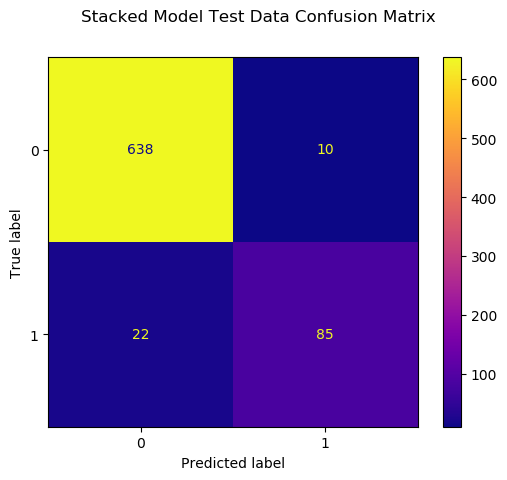

In [258]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("Stacked Model Test Data Confusion Matrix ")

plot_confusion_matrix(clf, X_test_f, y_test, ax=ax, cmap="plasma");
#plt.savefig('../reports/figures/stacked.png', transparent=True);

## Final Model Results

The model’s accuracy on unseen test data is .96 with an F-1 score of 98%. The model correctly predicts that 638 customers will not churn, and it correctly predicts that 85 customers will churn. It incorrectly predicts that 10 customers will churn, when they actually stay. And it incorrectly predicts that 22 customers will stay, when they actually leave. Overall the model is effective at predicting customer churn although improvements can be made.

# Exploratory Data Analysis and Visualizations

In [290]:
# feature correlations target "Churn"
corr = df.corr().Churn
corr

CustomerID                     0.031617
Churn                          1.000000
CityTier                       0.073858
Warehouse_To_Home              0.087318
HourSpendOnApp                 0.060845
Number_of_Devices              0.149041
Satisfaction_Score             0.095759
NumberOfAddress                0.076336
Complain                       0.238137
OrderAmountHikeFromlastYear    0.017193
CouponUsed                     0.010982
OrderCount                    -0.001962
Days_Since_Last_Order         -0.139254
CashbackAmount                -0.058866
Name: Churn, dtype: float64

['Tenure', 'Complain', 'Number_Of_Devices']
[34.001288379447104, 23.813730782624013, 14.904124329206853]


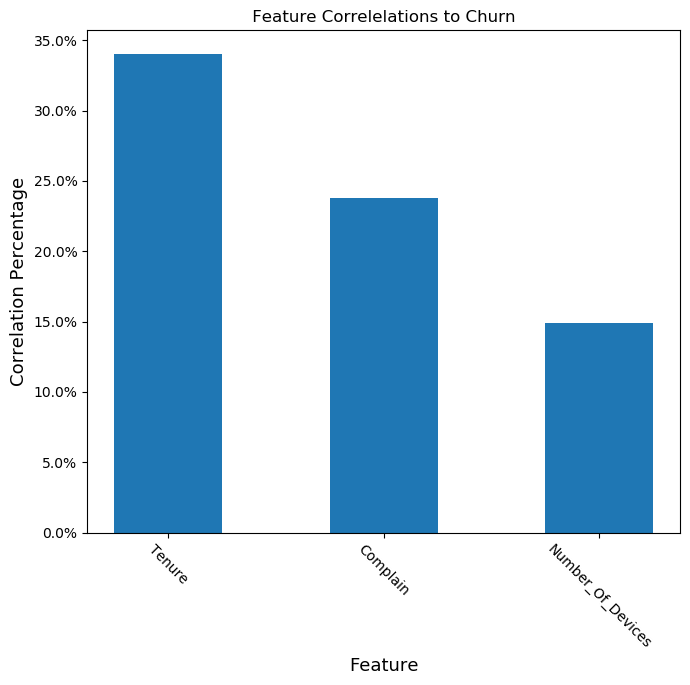

In [77]:
# function to plot feature correlations
def create_plot_of_feature_correlations(coeff_dict, top_num=10, figsize=(7, 6), title='Feature Correlations', xlabel='Feature', ylabel='Correlation Percentage', append_title='', prepend_title='', width=0.8, xrot=0, bar_colors=None, percent=None, save_path=None):
    ''' 
    Inputs: 
    
    model: A trained ensemble model instance
    X: a dataframe of the features used to train the model
    '''
    dict_keys = [key for key in coeff_dict.keys()]
    dict_values = [abs(value) for value in coeff_dict.values()]
    
    coeff_dict = {dict_keys[x]: dict_values[x] for x in range(len(dict_values))}
    coeff_dict = dict(list(coeff_dict.items())[:])
    features_and_importances = zip(coeff_dict.keys(), coeff_dict.values())
    features_and_importances = sorted(features_and_importances, key = lambda x: x[1], reverse=True)
    
    features = [i[0].title() for i in features_and_importances[1:top_num+1]]
    print(features)
    importances = [abs(i[1])*100 for i in features_and_importances[1:top_num+1]]
    print(importances)
    plt.rcdefaults()
    fig, ax = plt.subplots(figsize=figsize)
#     width = .35
    plt.bar(features, importances, width=width, color=bar_colors)
    if percent:
        ax.yaxis.set_major_formatter(PercentFormatter())
#     plt.gca().invert_yaxis()
    title = ' '.join([prepend_title, title, append_title])
    plt.title(title)
    plt.xlabel('Feature', fontsize=13)
    plt.ylabel(ylabel, fontsize=13)
    plt.xticks(rotation=xrot)
    plt.axis('tight')
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, transparent=True)
min_percent = 0.12
corr = df.corr().Churn
corr=dict(corr)
create_plot_of_feature_correlations(corr, title='Feature Correlelations to Churn', top_num=3, width=0.5, percent=True)
plt.xticks(rotation=-45);
#plt.savefig('../reports/figures/corrs.png', transparent=True);

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  app.launch_new_instance()


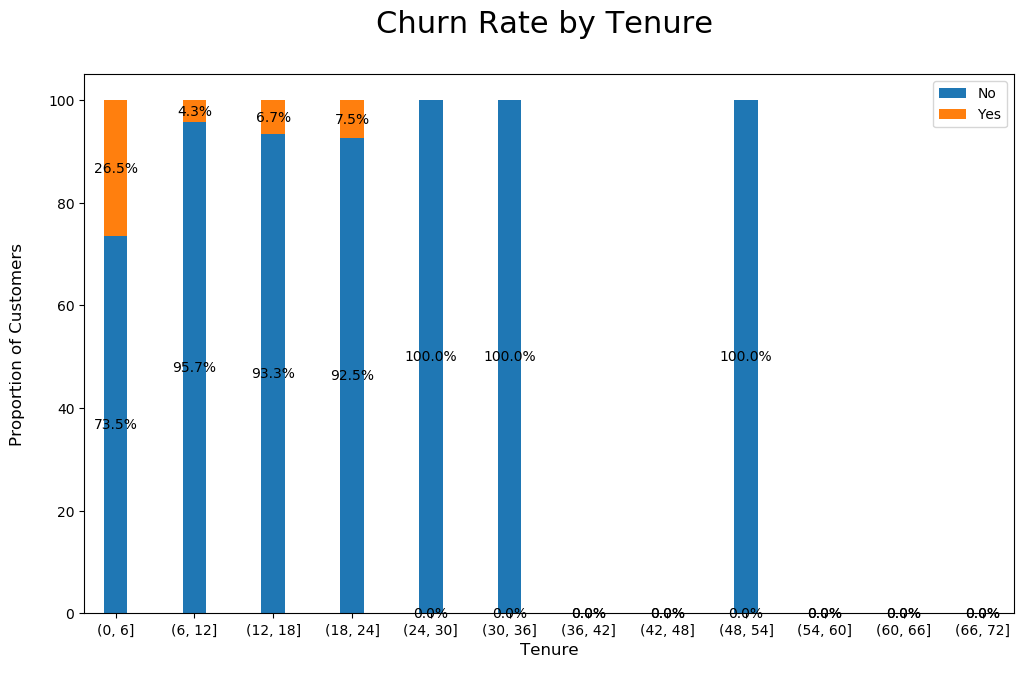

In [300]:
contract_churn = df.groupby(
['Tenure','Churn']).size().unstack()
contract_churn.rename(
columns={0:'No', 1:'Yes'}, inplace=True)
#colors  = ['#ec838a','#9b9c9a']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7))
plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Tenure\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Churn Rate by Tenure \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  app.launch_new_instance()


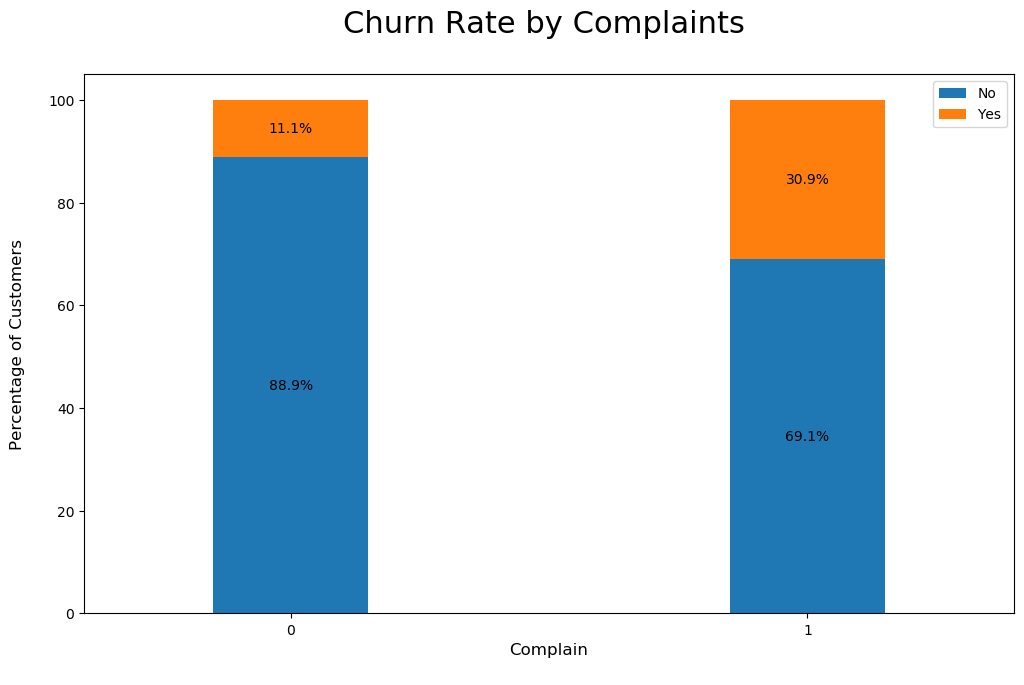

In [106]:
contract_churn = df.groupby(
['Complain','Churn']).size().unstack()
contract_churn.rename(
columns={0:'No', 1:'Yes'}, inplace=True)
#colors  = ['#ec838a','#9b9c9a']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7))
plt.ylabel('Percentage of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Complain\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Churn Rate by Complaints \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  app.launch_new_instance()


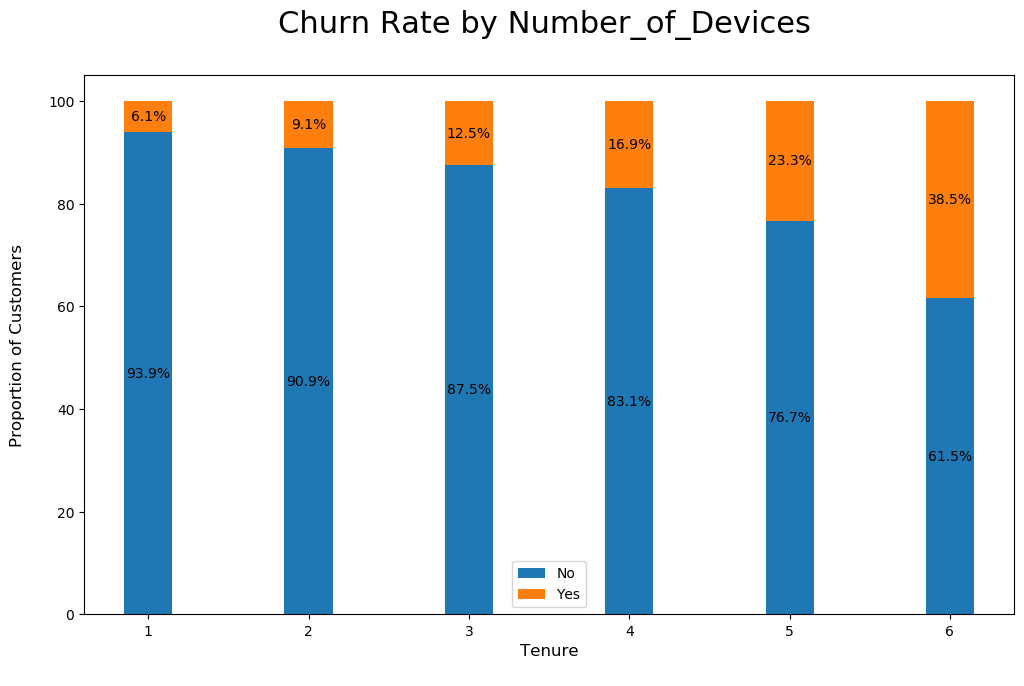

In [301]:
contract_churn = df.groupby(
['Number_of_Devices','Churn']).size().unstack()
contract_churn.rename(
columns={0:'No', 1:'Yes'}, inplace=True)
#colors  = ['#ec838a','#9b9c9a']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7))
plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Tenure\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Churn Rate by Number_of_Devices \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

In [84]:
# check feature importances from Random Forest model
rfm2.feature_importances_

array([0.02601658, 0.30382863, 0.01459245, 0.04891697, 0.01805895,
       0.03855419, 0.0387697 , 0.0520716 , 0.03817476, 0.03061996,
       0.02182513, 0.02615329, 0.0510958 , 0.03705279, 0.02655975,
       0.0112091 , 0.01140377, 0.00036094, 0.01742571, 0.01796247,
       0.01556061, 0.00685697, 0.01628087, 0.        , 0.03235651,
       0.00134285, 0.01821723, 0.00041163, 0.04327399, 0.03504678])

In [85]:
# create list of feature importances 
importances = list(zip(rfm2.feature_importances_, X_test_f.columns))
importances.sort(reverse=True)
importances

[(0.30382863128013116, 'Tenure'),
 (0.052071603463963535, 'NumberOfAddress'),
 (0.0510958035920222, 'Days_Since_Last_Order'),
 (0.048916969849916295, 'Warehouse_To_Home'),
 (0.04327399365629977, 'PreferedOrderCat_Laptop & Accessory'),
 (0.038769702694250466, 'Satisfaction_Score'),
 (0.03855419420057083, 'Number_of_Devices'),
 (0.0381747628822983, 'Complain'),
 (0.037052789063976944, 'CashbackAmount'),
 (0.03504677876668298, 'PreferedOrderCat_Mobile'),
 (0.032356510403064316, 'Gender_Female'),
 (0.03061995533866879, 'OrderAmountHikeFromlastYear'),
 (0.02655975077362147, 'PreferredLoginDevice_Computer'),
 (0.02615328627868742, 'OrderCount'),
 (0.026016583550194247, 'CustomerID'),
 (0.02182512854113055, 'CouponUsed'),
 (0.01821723381256612, 'PreferedOrderCat_Fashion'),
 (0.018058953870913375, 'HourSpendOnApp'),
 (0.01796246642935839, 'PreferredPaymentMode_Cash on Delivery'),
 (0.017425710586349903, 'PreferredPaymentMode_COD'),
 (0.016280868378623987, 'PreferredPaymentMode_E wallet'),
 (0.

In [90]:
# create dictionary of top 3 feature importances
RF_coeff_dict = {'Tenure': 0.30382863128013116,
 'Number of Addresses': 0.052071603463963535,
 'Days Since Last Order': 0.0510958035920222}

In [104]:
# function to plot feature importances
def create_plot_of_feature_importances(coeff_dict, top_num=10, title='Model Feature', append_title='Importances', prepend_title=''):
    ''' 
    Inputs: 
    
    model: A trained ensemble model instance
    X: a dataframe of the features used to train the model
    '''
    dict_keys = [key for key in coeff_dict.keys()]
    dict_values = [abs(value) for value in coeff_dict.values()]
    
    coeff_dict = {dict_keys[x]: dict_values[x] for x in range(len(dict_values))}
    coeff_dict = dict(list(coeff_dict.items())[:top_num])
    features_and_importances = zip(coeff_dict.keys(), coeff_dict.values())
    features_and_importances = sorted(features_and_importances, key = lambda x: x[1], reverse=True)
    
    features = [i[0] for i in features_and_importances]
    importances = [abs(i[1]) for i in features_and_importances]
    
    plt.figure(figsize=(10, 6))
    plt.barh(features, importances)
    plt.gca().invert_yaxis()
    title = ' '.join([prepend_title, title, append_title])
    plt.title(title)
    plt.xlabel('Importance')
    plt.tight_layout()

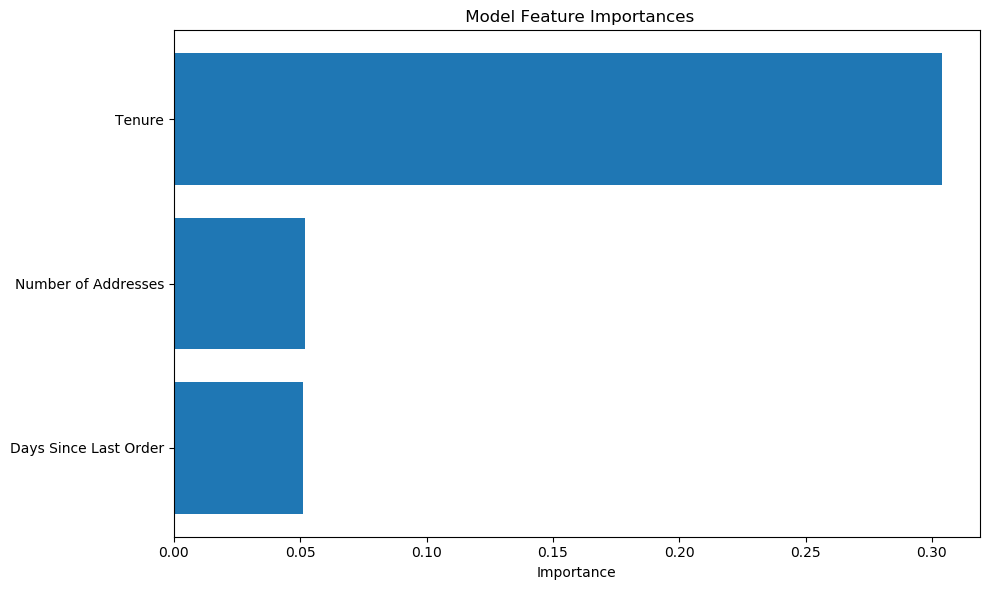

In [105]:
# plot feature importances
create_plot_of_feature_importances(RF_coeff_dict, prepend_title='')
#plt.savefig('../reports/figures/model_feat.png', transparent=True);

## Summary

By using CRISP - DM tecniques and machine learning algorithms I create a binary classification model with .96% accuracy and an F-1 score of 98%. This model, used alongside an understanding of the business and customer base is helpful in accurately predicting when a customer will churn.

My initial data exploration finds the strongest correlation is between customer tenure and churn. Additionally, it identifies customer complaints and number of devices used as highly correlated features with churn.

My model feature importances also identifies customer tenure as the top feature importance with number of addresses and days since last order as the second and third most important features. So it is worthwhile for the business to focus on customer tenure as the largest correlated factor in customer churn and incorporate solutions to identify and act early based on tenure. 